In [13]:
import json
import csv

In [14]:
import csv
import json


# Function to convert a CSV to JSON
# Takes the file paths as arguments
def make_json(csvFilePath, jsonFilePath):

# create a dictionary
    data = {}

 # Open a csv reader called DictReader
    with open(csvFilePath, encoding='utf-8') as csvf:
        csvReader = csv.DictReader(csvf)

        # Convert each row into a dictionary
        # and add it to data
        for rows in csvReader:
            key = rows['id']
            data[key] = rows

# Open a json writer, and use the json.dumps()
# function to dump data
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf:
        jsonf.write(json.dumps(data, indent=4))

# Decide the two file paths according to your
# computer system
csvFilePath = r'kidney_disease.csv'
jsonFilePath = r'kidney_disease.json'

# Call the make_json function
make_json(csvFilePath, jsonFilePath)



In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv('kidney_disease.csv')

In [17]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0, '':np.nan})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0, '':np.nan})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0, '':np.nan})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0, '':np.nan})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)

In [18]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
df2 = df.dropna(axis=0)
df2['class'].value_counts()

0.0    115
1.0     43
Name: class, dtype: int64

In [20]:
X = df2.iloc[:,:-7]
y = df2['class']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999,stratify = df2['class'])


In [22]:
md=range(2,6)
ne=range(6,17)
mf=range(2,8)

pipeline = Pipeline([('rf', RandomForestClassifier())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3, refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 2, 'rf__max_features': 2, 'rf__n_estimators': 7}
the R2 is  0.9791666666666666


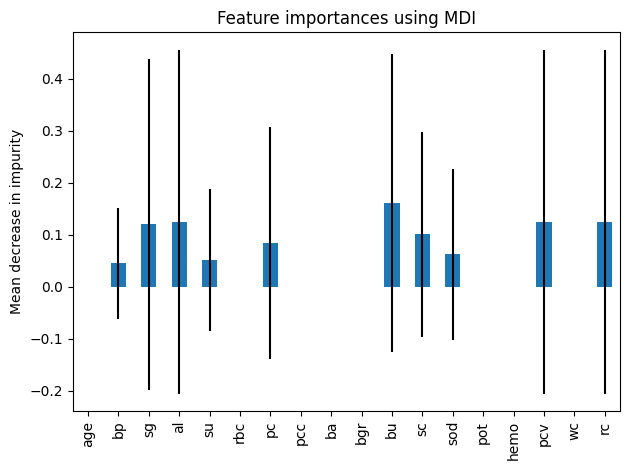

In [23]:
forest = RandomForestClassifier(max_depth= 2, max_features=2, n_estimators= 8)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns.values)


fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [24]:
#export model
joblib.dump(forest, "rfc_ml_model.m")

['rfc_ml_model.m']

In [25]:
df2

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,32,4500,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
def trainModel(dname):
    X = df2.iloc[:,:-7]
    y = df2[dname]
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999,stratify = df2[dname])
    md=range(2,6)
    ne=range(6,17)
    mf=range(2,8)

    pipeline = Pipeline([('rf', RandomForestRegressor())])
    parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3, refit=True)

    grid_search.fit(X_train, y_train)
    print('the best parameter is ',grid_search.best_params_)
    print('the R2 is ',grid_search.score(X_test, y_test))
    forest = RandomForestRegressor(max_depth= grid_search.best_params_['rf__max_depth'], max_features=grid_search.best_params_['rf__max_features'], n_estimators= grid_search.best_params_['rf__n_estimators'])
    forest.fit(X_train, y_train)
    joblib.dump(forest, str(dname + "_rfc_ml_model.m"))

In [27]:
#train and export model
trainModel('htn')
trainModel('dm')
trainModel('cad')
trainModel('pe')
trainModel('ane')

the best parameter is  {'rf__max_depth': 4, 'rf__max_features': 3, 'rf__n_estimators': 13}
the R2 is  0.8362372165589813
the best parameter is  {'rf__max_depth': 2, 'rf__max_features': 3, 'rf__n_estimators': 6}
the R2 is  0.5854177543660679
the best parameter is  {'rf__max_depth': 5, 'rf__max_features': 2, 'rf__n_estimators': 8}
the R2 is  0.3027777777777778
the best parameter is  {'rf__max_depth': 2, 'rf__max_features': 3, 'rf__n_estimators': 13}
the R2 is  0.5441929960814742
the best parameter is  {'rf__max_depth': 5, 'rf__max_features': 4, 'rf__n_estimators': 12}
the R2 is  0.5054263565891474


In [28]:
X = df2.iloc[:,:-7]
y = df2['htn']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999,stratify = df2['htn'])

In [30]:
md=range(2,6)
ne=range(6,17)
mf=range(2,8)

pipeline = Pipeline([('rf', RandomForestRegressor())])
parameters = {'rf__n_estimators':ne,'rf__max_depth': md,'rf__max_features':mf}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,  cv=3, refit=True)

grid_search.fit(X_train, y_train)
print('the best parameter is ',grid_search.best_params_)
print('the R2 is ',grid_search.score(X_test, y_test))

the best parameter is  {'rf__max_depth': 3, 'rf__max_features': 7, 'rf__n_estimators': 10}
the R2 is  0.8609987952022915


In [31]:
grid_search.best_params_['rf__max_depth']

3

In [32]:
forest = RandomForestRegressor(max_depth= 2, max_features=5, n_estimators= 8)
forest.fit(X_train, y_train)
forest.predict(X[:1])

array([0.84205423])